<a href="https://colab.research.google.com/github/yossi0y530y/DO180-apps/blob/master/harmonic_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Harmonic Functions Computational Project**
<small>version: 20.05.25a</small>
## **Preparation**
* First thing, please read the project booklet
  from the project Moodle page.
* To do this project, **you must read and work
  through the main Colab Notebook**:  
  https://colab.research.google.com/github/samyzaf/notebooks/blob/main/harmonic_animation.ipynb
* Understanding well the
  [**harmonic_animation.ipynb**](https://colab.research.google.com/github/samyzaf/notebooks/blob/main/harmonic_animation.ipynb)
  notebook will provide you with the skills and the tools
  that you need for this project.
  * Make sure to cover the Python and Colab tutorials
    before you start the project!

* An additional motivational example (Steve Jobs Calligraphy Story)
  is also highly recommended:  
  https://colab.research.google.com/github/samyzaf/notebooks/blob/main/harmonic_fonts.ipynb

## **Installation and Loading**
* Run the following cell to install and load the
  [**cfclon** software](https://samyzaf.com/cfclon.zip)
  needed for our work.

In [2]:
%pip install -q https://samyzaf.com/cfclon.zip   # Install the cfclon package on your Google virtual machine
from cfclon import *                             # Load the cfclon commands to this notebook
plt.rcParams['figure.dpi'] = 90                  # Set the dots per inch resolution to 90 dpi
reg.log.state = "disabled"                       # Disable cfclon log messages
load_db("https://samyzaf.com/cfproj/man.db")     # Load the man character database

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


## **Registration**
* Please enter your name, identity number, and email
  address in the following form.
* After any change, press the **play** button &#9658; to update.

# **You have two tasks: TASK 1 and TASK 2**

## **These are your 4 puzzles for TASK 1**

## **puzzle1** (4x4)

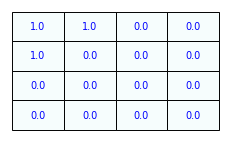

## **puzzle2** (4x4)

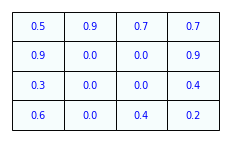

## **puzzle3** (4x5)

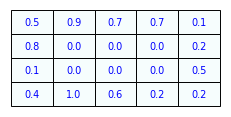

## **puzzle4** (5x5)

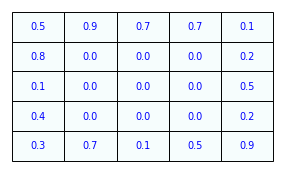

They are also stored in the variables:
puzzle1, puzzle2, puzzle3, puzzle4.
You can always reset their values by activating this form again.


## **TASK 2 - cloning a man figure**

### **Two cages will be assigned when you download your polygons (see bellow).**

In [94]:
#@title **Student Form** {"form-width":"50%"}
Name = 'יוסי גורטובניק' # @param {type:"string"}
Id = '208328229' # @param {type:"string"}
Email = 'ygurtovnik@campus.technion' # @param {type:"string"}

RunForm("project5")

## **TASK 1**<br/>**Solving Harmonic Puzzles**
* In the project booklet we defined **Harmonic Puzzles**,
the discrete version of a real harmonic function,
  and learned how to solve them by using linear algebra  
  
  <IMG src="https://samyzaf.com/cfproj/hcw2.png" width="40%"/>  
  <IMG src="https://samyzaf.com/cfproj/hcw3b.png" width="40%"/>

* It turns out that if our puzzles are very large,
  like for example 1920x1200 pixel images in a movie animation,
  then we will need to solve 2 million equations with 2 million
  variables! This is very slow and memory expensive, even
  with the best computing systems in the world,
  and therefore is not practical for movie animation.

* The people at [Pixar Animation Studios](https://www.pixar.com)
  came up with simple, elegant, fast, and practical numeric
  algorithms for solving large (polygonal) puzzles,
  which enabled them to implement
  harmonic coordinates in Pixar movies efficiently.

* Your first task is to implement the numerical method
  for solving general mxn puzzles.

* A puzzle can be represented by a Python 2D array,
  which is a simple list of rows

In [4]:
puzzle1 = np.array([
    [1.0, 1.0, 0.0 ,0.0],
    [1.0, 0.0, 0.0 ,0.0],
    [0.0, 0.0, 0.0 ,0.0],
    [0.0, 0.0, 0.0 ,0.0],
])

* A **Numpy** 2d matrix is simply a list of rows.
* To see it more clearly, use the **print** function.

In [5]:
print(puzzle1)

[[1. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


* We also have a nice utility for drawing puzzles.

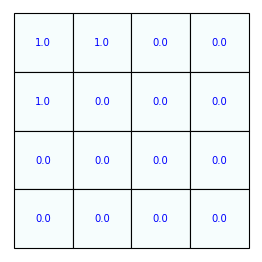

In [6]:
draw_table(puzzle1)

* To solve this puzzle we need to find the values
  $x_{11}$, $x_{12}$, $x_{21}$, $x_{22}$, which make this
  puzzle harmonic  
  <IMG src="https://samyzaf.com/cfproj/hcw2a.png" width="25%"/>

* Remember that a puzzle is harmonic if every **internal cell value**
  is the average of its 8 neighbors!

* Lets define a function for computing the average of the
  neighbors of cell **(i,j)**.  
  <IMG src="https://samyzaf.com/cfproj/hcw2c.png" width="20%"/>

In [7]:
def Average(puz, i, j):
    average = (puz[i-1,j] + puz[i,j-1] + puz[i+1,j] + puz[i,j+1] +
        puz[i-1,j-1] + puz[i-1,j+1] + puz[i+1,j-1] + puz[i+1,j+1]) / 8
    return average

* For example, lets compute the average at cell (1,1) of puzzle1.

In [8]:
Average(puzzle1, 1, 1)

0.375

* We can now insert this value to cell (1,1) and redraw our puzzle1.

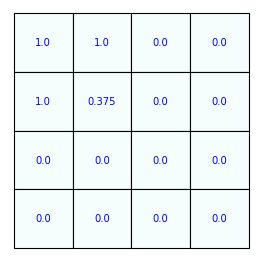

In [9]:
puzzle1[1,1] = Average(puzzle1, 1, 1)
draw_table(puzzle1)

* We can do the same action on cells (1,2), (2,1), and (2,2).

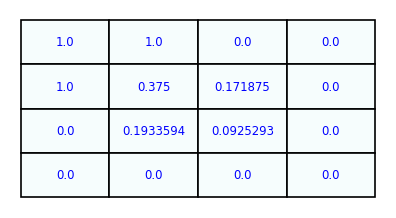

In [10]:
puzzle1[1,2] = Average(puzzle1, 1, 2)
puzzle1[2,1] = Average(puzzle1, 2, 1)
puzzle1[2,2] = Average(puzzle1, 2, 2)
draw_table(puzzle1, dx=120, dy=60, fontsize=7)

* Does it look close to the real solution?  
  <IMG src="https://samyzaf.com/cfproj/hcw2.png" width="30%"/>  

* How do we check it?

* It is easy to write a Python method for checking
  if a puzzle **puz** is harmonic.

In [11]:
def CheckPuzzle(puz, epsilon=1e-7):
    m,n = puz.shape
    for i in range(1,m-1):
        for j in range(1,n-1):
            if abs(puz[i,j] - Average(puz, i, j)) > epsilon:
                return False
    return True

* The best we can do when we work with floating point numbers
  is make sure that the distance between **puz[i,j]** and
  the average **Average(puz,i,j)** is small enough.

* We use the Python absolute value function
  **abs(x)** for checking if the absolute value of
  **puz[i,j] - Averagae(puz,i,j)**
  is smaller than **epsilon=1e-7** (0.0000001),
  for every internal cell **(i,j)**.

* This condition should apply to
  **internal cells (i,j)** only!
  The boundary cells are not subject to any change or constraint.
  * This is why the **for loop** runs
    only for values i=1,...,m-2 and j=1,...,n-2
    (and not for i=0,...,m-1 and j=0,...,n-1).

* Now we can easily check if our **puzzle1** is harmonic.

In [12]:
CheckPuzzle(puzzle1)

False

* So applying the **Average** operation one time does not
  yield a solution of the puzzle.
* What happens if we repeat all 4 actions again?
  and again ... and again ... ?
* After each iteration we also check if our puzzle is harmonic.

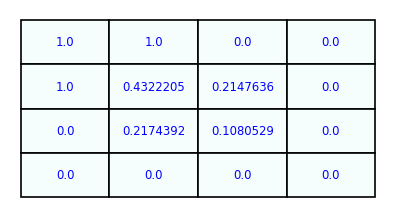

False

In [13]:
puzzle1[1,1] = Average(puzzle1, 1, 1)
puzzle1[1,2] = Average(puzzle1, 1, 2)
puzzle1[2,1] = Average(puzzle1, 2, 1)
puzzle1[2,2] = Average(puzzle1, 2, 2)
draw_table(puzzle1, dx=120, dy=60, fontsize=7)

CheckPuzzle(puzzle1, epsilon=1e-7)

* You can execute the previous code cell again and again,
  and see what happens?
  * Hint: $0.444444... = \frac{4}{9}$.

## **TASK 1A:**
* Based on the above observation,
  write a Python function **RunAverage**,
  which accepts a general **mxn** puzzle and
  performs the **Average** on every internal
  cell **(i,j)** of the puzzle.

* Note that a cell **(i,j)** is **internal**
  if **i=1,2,...,m-2** and **j=1,2,...,n-2**.

* Notice that this function is changing the puzzle!
  It replaces all the internal cells with their average.
  To reset the puzzles,
  replay the registration form above.

* To obtain the puzzle shape **(m,n)** use:  
  **m,n = puzzle.shape**  
  This should be the first line in your code.

In [95]:
# puzzle = mxn Numpy array
# The first line retrieves the number of rows m, and number of columns n

def RunAverage(puzzle):
    m,n = puzzle.shape
    for i in range(1,m-1):
      for j in range(1,n-1):
        puzzle[i,j] = Average(puzzle, i, j)

## **TASK 1B:**
* Pixar labs researchers observed that if we repeat
  this method enough times, then the puzzle **converges**
  to its harmonic solution!
* This has also been proved mathematically.
  You can read about it in the papers that are listed
  in the project booklet bibliography.
* Based on this observation,
  write a Python function **SolvePuzzle**,
  which accepts a general **mxn** puzzle and
  an optional argument **epsilon**,
  which solves the puzzle with precision level **epsilon**.

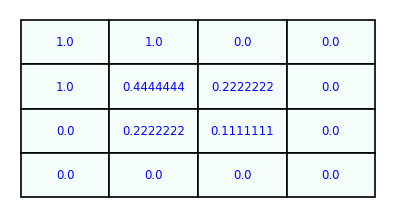

True

In [96]:
# puzzle = mxn Numpy array
# epsilon = max error. Default=0.0000001

def SolvePuzzle(puzzle, epsilon=1e-7):
  while True:
    RunAverage(puzzle)
    if CheckPuzzle(puzzle, epsilon):
      break
SolvePuzzle(puzzle1,1e-7)
draw_table(puzzle1, dx=120, dy=60, fontsize=7)
CheckPuzzle(puzzle1, epsilon=1e-7)

## **TASK 1C**
* Use your **SolvePuzzle** method to solve
  puzzle2, puzzle3, and puzzle4,
  with precision level 1e-7.
* Then write your code for solving and drawing these 3 puzzles
  in the following code cell.

### $\bullet$ **Write your code in the following cell.**

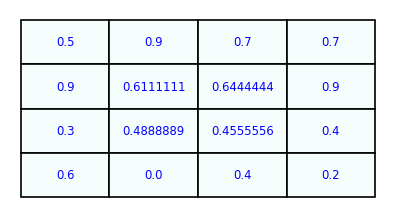

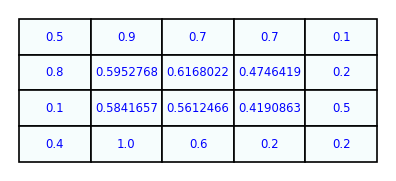

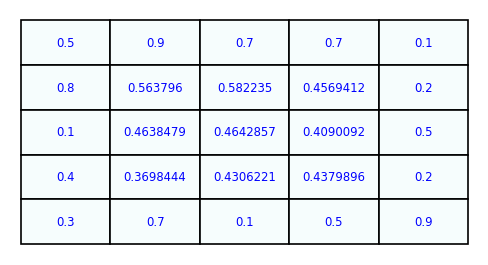

In [98]:
SolvePuzzle(puzzle2,1e-7)
SolvePuzzle(puzzle3,1e-7)
SolvePuzzle(puzzle4,1e-7)
draw_table(puzzle2, dx=120, dy=60, fontsize=7)
draw_table(puzzle3, dx=120, dy=60, fontsize=7)
draw_table(puzzle4, dx=120, dy=60, fontsize=7)

## **TASK 1D**
* In addition to **puzzle1** ... **puzzle4**,
  we also have a special large
  puzzle **puzzle5**.
  
* To define it use the command **get_puzzle5()**.
  This command also draws it as a thermal map,
  and resets its original value.

* This is a **26x26** size puzzle, so printing it
  or drawing its table is not practical (but
  you can try to see what happens).

* In such cases, we use visualization methods such as
  **Thermal Maps** to get a feel of it.

### **puzzle5** (26x26) has been defined. You may use it now.

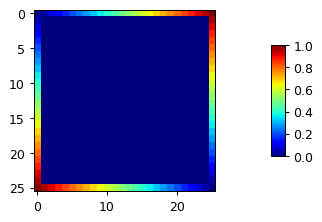

In [34]:
get_puzzle5()

* If you insist, you can view small parts of **puzzle5**
  by commands such as

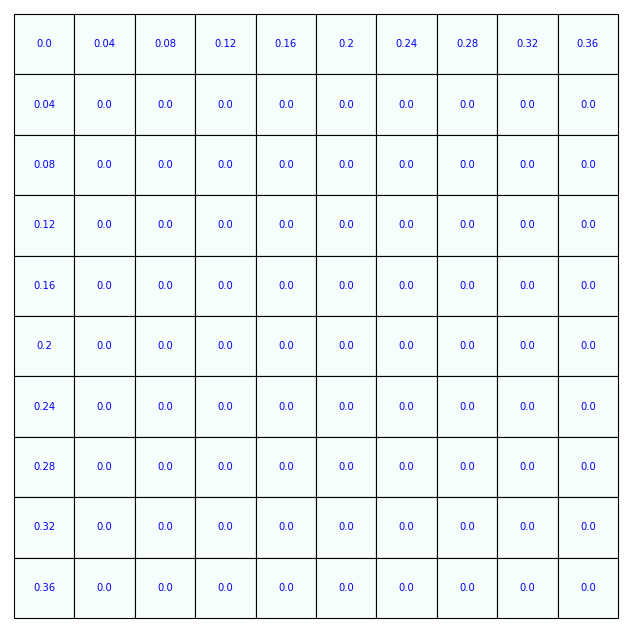

In [35]:
draw_table(puzzle5[0:10,0:10])

* Try to run the following code repeatedly (at least 50 times)
  and see what happens?  
* What is your observation?
* What kind of **Physical Phenomenon** do you notice?
* Use exactly two words to describe your hypothesis about what happens.

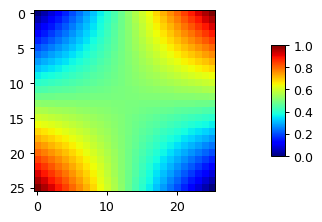

In [36]:
RunAverage(puzzle5)
draw_thermal_map(puzzle5)

In [37]:
#@title **Phenomenon Description** {"form-width":"50%"}
#@markdown **Enter your two words description and press the play button**
Description = 'heat transfer' # @param {type:"string", placeholder:'Enter your two words description here (English)'}


This might give you an additional hint.

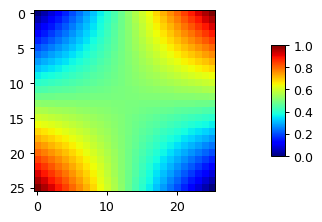

In [38]:
SolvePuzzle(puzzle5)
draw_thermal_map(puzzle5)

## **TASK 2**<br/>**Cloning a 2D Man Figure**
* In your second task you will have to clone a **2D man figure**
  into a given **cage2**.
* The man figure is given as a polygon with **178 vertices**,
  and the two cages are 21 vertices polygons.
* In the following command we load and print these 3 polygons.

In [58]:
man, cage1, cage2 = load_polygons()
print(f"man = {man}")
print(f"cage1 = {cage1}")
print(f"cage2 = {cage2}")

man = [(506.333, 135.0), (515.667, 123.0), (531.0, 108.333), (555.667, 98.333), (591.0, 98.0), (616.0, 106.0), (639.0, 121.0), (655.0, 136.0), (650.0, 145.0), (656.0, 160.0), (651.0, 169.0), (650.0, 182.0), (650.0, 190.0), (660.0, 210.0), (660.0, 216.0), (648.0, 223.0), (650.0, 232.0), (647.667, 235.667), (650.0, 240.0), (646.0, 249.0), (648.0, 258.0), (644.0, 269.0), (634.0, 272.0), (621.0, 272.0), (613.0, 270.0), (610.0, 281.0), (617.0, 284.0), (624.0, 291.0), (626.0, 303.0), (619.0, 310.0), (617.0, 329.0), (619.0, 344.0), (624.0, 360.0), (625.0, 376.0), (629.0, 399.0), (636.0, 419.0), (637.0, 459.0), (640.0, 479.0), (643.0, 496.0), (644.0, 512.0), (642.0, 526.0), (644.0, 562.0), (644.0, 588.0), (646.0, 609.0), (650.0, 628.0), (652.0, 645.0), (653.0, 671.0), (652.0, 691.0), (651.0, 705.0), (650.0, 718.0), (636.0, 721.0), (647.0, 758.0), (655.0, 804.0), (668.0, 868.0), (676.0, 905.0), (687.0, 930.0), (693.0, 956.0), (699.0, 987.0), (703.0, 1017.0), (710.667, 1046.333), (717.333, 1081.

* The Python **len** command counts the number
  of elements in a list (or any container object).
* We can use it for counting the number of vertices in our polygons.

In [59]:
print(len(man))
print(len(cage1))
print(len(cage2))

178
21
21


* To get a better impression, lets draw the man figure and cage1.

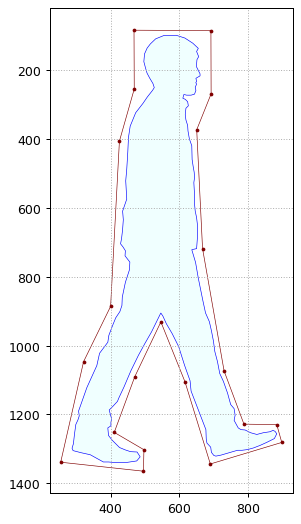

In [60]:
plt.figure(figsize=(7,7))
draw_curve(man, fill=True, facecolor="azure", linewidth=0.5)
draw_cage(cage1, linewidth=0.5)

show_plot()

* The man figure looks smooth, but if you zoom in,
  you can notice it is really a polygon of straight segments.
* For example the head consists of 36 vertices.   

  <IMG src="https://samyzaf.com/cfproj/man_zoomto_head.jpg" width="40%"/>

* Lets draw **cage2**.

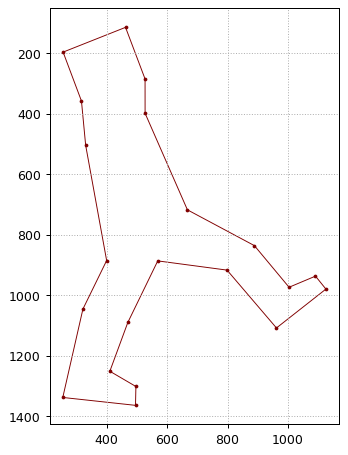

In [42]:
plt.figure(figsize=(6,6))
draw_cage(cage2, linewidth=0.75)
show_plot()

## **TASK 2A**
* Write code for
  1. Cloning the man figure into **cage2**.
  2. Drawing the cloned man figure and
     **cage2** in the same figure.

* **Write you code in the following cell.**

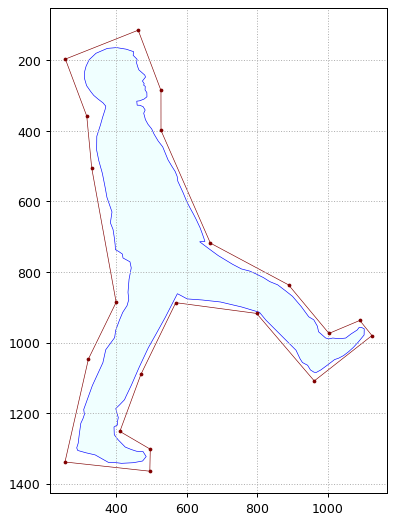

In [93]:
transitional_man = harmonic_coordinates(man)
man2 = clone(transitional_man,cage2)

plt.figure(figsize=(7,7))
draw_curve(man2, fill=True, facecolor="azure", linewidth=0.5)
draw_cage(cage2, linewidth=0.5)

show_plot()

## **Task 2B**
* In the next figure we define and draw three points
  **p1**, **p2**, **p3**,
  inside our initial man figure.

(421.2055942074014, 255.61852869772068)
(351.03280753027263, 1250.4169824797766)
(912.4923537049168, 973.2851212396876)


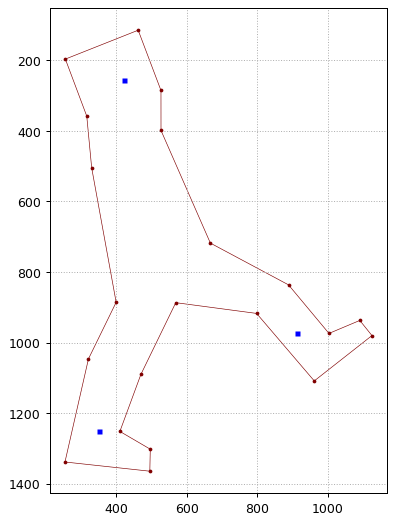

In [92]:
p1 = (600,200)
p2 = (350,1250)
p3 = (700,1200)
w1 = harmonic_coordinates(p1)
w2 = harmonic_coordinates(p2)
w3 = harmonic_coordinates(p3)
p_1 = clone(w1,cage2)
p_2 = clone(w2,cage2)
p_3 = clone(w3,cage2)
print(p_1)
print(p_2)
print(p_3)


plt.figure(figsize=(7,7))
draw_point(p_1)
draw_point(p_2)
draw_point(p_3)
draw_cage(cage2, linewidth=0.5)
show_plot()

<IMG src="https://samyzaf.com/cfproj/man51.png" width="70%"/>

* Your mission is to compute the new location of these
  points after cloning the man figure to **cage2**.

### **Write the new locations of points p1, p2, p3, in the following cell.**

In [90]:
# Write you final answer here:
p1 = (421.2055942074014, 255.61852869772068)
p2 = (351.03280753027263, 1250.4169824797766)
p3 = (912.4923537049168, 973.2851212396876)

* **Only the final numerical answer will be checked.
  Code is not required.**

* 6 digits precision is good enough.

## **Your Tools**
* The only **cfclon** functions you are allowed to use are:
  * **harmonic_coordinates**
  * **clone**
  * **draw_line**
  * **draw_point**
  * **draw_curve**
  * **draw_poly**
  * **draw_cage**
  * **show_plot**
  * **draw_table**

  * All the **standard Python commands** are of course allowed.
     You may not load external libraries.

* You don't need to draw point labels or point coordinates
  in your figures.

## **Task Submission**
* After completing this task
  save this notebook to your local disk,
  and later upload the ipynb file to your
  Moodle account for grading.
* From the **File/Download** menu download it to your local
  disk as an **ipynb** file.
* Please keep the file original name: **harmonic_task.ipynb**.
* The exact Moodle box for submitting the
  project is: "הגשת המטלה התיכנותית".